In [1]:
# # !pip install pandas openpyx
# # !pip install pandas
# !pip install matplotlib
# !pip install numpy
# !pip install seaborn
# !pip install plotly
# !pip install scikit-learn

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder
from datetime import datetime, timedelta
import openpyxl

In [2]:
df = pd.read_excel("C:/Users/viren/OneDrive/Desktop/IIT-MADARAS(GUVI)/Industrial Copper Modeling/Copper_Set.xlsx")

In [4]:
# print(df[['item_date', 'delivery date']].head())
# print(df[['item_date', 'delivery date']].isna().sum())

In [3]:
df


id   item_date quantity tons  \
0       EC06F063-9DF0-440C-8764-0B0C05A4F6AE  20210401.0     54.151139   
1       4E5F4B3D-DDDF-499D-AFDE-A3227EC49425  20210401.0    768.024839   
2       E140FF1B-2407-4C02-A0DD-780A093B1158  20210401.0    386.127949   
3       F8D507A0-9C62-4EFE-831E-33E1DA53BB50  20210401.0    202.411065   
4       4E1C4E78-152B-430A-8094-ADD889C9D0AD  20210401.0    785.526262   
...                                      ...         ...           ...   
181668  DE633116-D1DF-4846-982E-55EFC3658A76  20200702.0    102.482422   
181669  A48374B1-E6DB-45F2-889A-1F9C27C099EB  20200702.0    208.086469   
181670  91643238-5C7B-4237-9A5F-63AE3D35F320  20200702.0      4.235594   
181671  7AFFD323-01D9-4E15-B80D-7D1B03498FC8  20200702.0         -2000   
181672  AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC  20200702.0    406.686538   

          customer  country status item type  application  thickness   width  \
0       30156308.0     28.0    Won         W         10.0       2.00  1500.0   
1       30202938.0     25.0    Won         W         41.0       0.80  1210.0   
2       30153963.0     30.0    Won        WI         28.0       0.38   952.0   
3       30349574.0     32.0    Won         S         59.0       2.30  1317.0   
4       30211560.0     28.0    Won         W         10.0       4.00  2000.0   
...            ...      ...    ...       ...          ...        ...     ...   
181668  30200854.0     25.0    Won         W         41.0       0.96  1220.0   
181669  30200854.0     25.0    Won         W         41.0       0.95  1500.0   
181670  30200854.0     25.0    Won         W         41.0       0.71  1250.0   
181671  30200854.0     25.0    Won         W         41.0       0.85  1250.0   
181672  30200854.0     25.0    Won         W         41.0       0.71  1240.0   

                                    material_ref  product_ref  delivery date  \
0                                    DEQ1 S460MC   1670798778     20210701.0   
1       0000000000000000000000000000000000104991   1668701718     20210401.0   
2                                       S0380700       628377     20210101.0   
3                        DX51D+ZM310MAO 2.3X1317   1668701718     20210101.0   
4                                2_S275JR+AR-CL1       640665     20210301.0   
...                                          ...          ...            ...   
181668  0000000000000000000000000000000001000777    164141591     20200701.0   
181669  0000000000000000000000000000000001000227    164141591     20200701.0   
181670  0000000000000000000000000000000001004216    164141591     20200701.0   
181671  0000000000000000000000000000000001001149    164141591     20200701.0   
181672  0000000000000000000000000000000001005439    164141591     20200701.0   

        selling_price  
0              854.00  
1             1047.00  
2              644.33  
3              768.00  
4              577.00  
...               ...  
181668         591.00  
181669         589.00  
181670         619.00  
181671         601.00  
181672         607.00  

[181673 rows x 14 columns]

In [4]:
df.shape

(181673, 14)

In [5]:
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [6]:
# id of all the values are unique so features of id need to drop
df.drop(columns=['id'], inplace=True)
df.head()

item_date quantity tons    customer  country status item type  \
0  20210401.0     54.151139  30156308.0     28.0    Won         W   
1  20210401.0    768.024839  30202938.0     25.0    Won         W   
2  20210401.0    386.127949  30153963.0     30.0    Won        WI   
3  20210401.0    202.411065  30349574.0     32.0    Won         S   
4  20210401.0    785.526262  30211560.0     28.0    Won         W   

   application  thickness   width                              material_ref  \
0         10.0       2.00  1500.0                               DEQ1 S460MC   
1         41.0       0.80  1210.0  0000000000000000000000000000000000104991   
2         28.0       0.38   952.0                                  S0380700   
3         59.0       2.30  1317.0                   DX51D+ZM310MAO 2.3X1317   
4         10.0       4.00  2000.0                           2_S275JR+AR-CL1   

   product_ref  delivery date  selling_price  
0   1670798778     20210701.0         854.00  
1   1668701718     20210401.0        1047.00  
2       628377     20210101.0         644.33  
3   1668701718     20210101.0         768.00  
4       640665     20210301.0         577.00

In [7]:
# Check the count of NaN values in all features
df.isnull().sum()

item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [8]:
# Most of the Nana values are in 'material_ref' columns
# verify NaN values in 'Material_reference' before replacment
print(f"Nan value in 'Material_Reference' before replacement = {df['material_ref'].isnull().sum()}")

# Some values are present in 'Material_ref' which starts with '00000' value which should be converted into null
df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)

# verify NaN values in 'Material_reference' after replacement
print(f"NaN value in 'Material_reference' after replacement = {df['material_ref'].isnull().sum()}")

Nan value in 'Material_Reference' before replacement = 77919
NaN value in 'Material_reference' after replacement = 100645


In [9]:
# Verify NaN values in 'Material_reference' after replacement in % 
print(np.round(df['material_ref'].isnull().mean()*100, 5),"% of missing values")

55.39899 % of missing values


In [10]:
# 'Material_ref' columns have more than 55% are null values so we need to drop .
df.drop(columns=['material_ref'], inplace=True)
df.head()


item_date quantity tons    customer  country status item type  \
0  20210401.0     54.151139  30156308.0     28.0    Won         W   
1  20210401.0    768.024839  30202938.0     25.0    Won         W   
2  20210401.0    386.127949  30153963.0     30.0    Won        WI   
3  20210401.0    202.411065  30349574.0     32.0    Won         S   
4  20210401.0    785.526262  30211560.0     28.0    Won         W   

   application  thickness   width  product_ref  delivery date  selling_price  
0         10.0       2.00  1500.0   1670798778     20210701.0         854.00  
1         41.0       0.80  1210.0   1668701718     20210401.0        1047.00  
2         28.0       0.38   952.0       628377     20210101.0         644.33  
3         59.0       2.30  1317.0   1668701718     20210101.0         768.00  
4         10.0       4.00  2000.0       640665     20210301.0         577.00

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181672 non-null  float64
 1   quantity tons  181673 non-null  object 
 2   customer       181672 non-null  float64
 3   country        181645 non-null  float64
 4   status         181671 non-null  object 
 5   item type      181673 non-null  object 
 6   application    181649 non-null  float64
 7   thickness      181672 non-null  float64
 8   width          181673 non-null  float64
 9   product_ref    181673 non-null  int64  
 10  delivery date  181672 non-null  float64
 11  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 16.6+ MB


In [12]:
df[['item_date', 'delivery date']].head()

item_date  delivery date
0  20210401.0     20210701.0
1  20210401.0     20210401.0
2  20210401.0     20210101.0
3  20210401.0     20210101.0
4  20210401.0     20210301.0

In [13]:
# Convert quantity tons to numeric
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')

# Ensure dates are treated as strings to avoid float issues
df['item_date'] = df['item_date'].astype(str).str.replace('\.0$', '', regex=True)
df['delivery date'] = df['delivery date'].astype(str).str.replace('\.0$', '', regex=True)

# Convert to datetime with correct format
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')

In [16]:
# # convert teh data type from object to numeric:

# df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')

# #Convert object type date columns to date format
# df['item_date'] = pd.to_datetime(df['item_date'], format='%y%m%d',errors='coerce')
# df['delivery date'] = pd.to_datetime(df['delivery date'], format='%y%m%d', errors='coerce')

In [14]:
df.dtypes

item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [15]:
df.describe()

item_date  quantity tons      customer  \
count                         181670   1.816720e+05  1.816720e+05   
mean   2020-11-26 22:56:58.127374080   5.874926e+03  3.051221e+07   
min              2020-07-02 00:00:00  -2.000000e+03  1.245800e+04   
25%              2020-09-29 00:00:00   1.097030e+01  3.019688e+07   
50%              2020-11-30 00:00:00   3.036464e+01  3.020524e+07   
75%              2021-02-03 00:00:00   6.716061e+01  3.028042e+07   
max              2021-04-01 00:00:00   1.000000e+09  2.147484e+09   
std                              NaN   2.349081e+06  2.433382e+07   

             country    application      thickness          width  \
count  181645.000000  181649.000000  181672.000000  181673.000000   
mean       44.893022      25.615809       2.564827    1295.286724   
min        25.000000       2.000000       0.180000       1.000000   
25%        26.000000      10.000000       0.700000    1180.000000   
50%        30.000000      15.000000       1.500000    1250.000000   
75%        78.000000      41.000000       3.000000    1500.000000   
max       113.000000      99.000000    2500.000000    2990.000000   
std        24.404214      17.754175       6.572321     261.631754   

        product_ref                  delivery date  selling_price  
count  1.816730e+05                         181670   1.816720e+05  
mean   4.739679e+08  2021-01-25 22:44:26.223372032   1.918036e+03  
min    6.117280e+05            2019-04-01 00:00:00  -1.160000e+03  
25%    6.119930e+05            2020-11-01 00:00:00   6.690000e+02  
50%    6.406650e+05            2021-01-01 00:00:00   8.120000e+02  
75%    1.332077e+09            2021-04-01 00:00:00   9.530000e+02  
max    1.722208e+09            2022-01-01 00:00:00   1.000010e+08  
std    7.175101e+08                            NaN   3.317956e+05

In [16]:
print("Rows with NaT values:")
print(df[df['item_date'].isna() | df['delivery date'].isna()][['item_date', 'delivery date']])

Rows with NaT values:
        item_date delivery date
52            NaT    2021-06-01
58     2021-04-01           NaT
104640        NaT    2021-01-01
104761 2020-11-12           NaT
105421 2020-11-12           NaT
105485        NaT    2021-02-01


In [17]:
# Assuming you have access to the original data (before pd.to_datetime)
# Reload the raw data or use a backup if available
df_raw = pd.read_excel('C:/Users/viren/OneDrive/Desktop/IIT-MADARAS(GUVI)/Industrial Copper Modeling/Copper_Set.xlsx', dtype={'item_date': str, 'delivery date': str})
print("Raw values for rows with NaT:")
print(df_raw.loc[[52, 58, 104640, 104761, 105421, 105485], ['item_date', 'delivery date']])

Raw values for rows with NaT:
       item_date delivery date
52      19950000      20210601
58      20210401      30310101
104640       NaN      20210101
104761  20201112           NaN
105421  20201112      20212222
105485  20191919      20210201


In [18]:
# Quantity tons and selling price values are not below 0. so we convert to null below 0 values.

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe()

item_date  quantity tons      customer  \
count                         181670   1.816680e+05  1.816720e+05   
mean   2020-11-26 22:56:58.127374080   5.875066e+03  3.051221e+07   
min              2020-07-02 00:00:00   1.000000e-05  1.245800e+04   
25%              2020-09-29 00:00:00   1.097122e+01  3.019688e+07   
50%              2020-11-30 00:00:00   3.036501e+01  3.020524e+07   
75%              2021-02-03 00:00:00   6.716134e+01  3.028042e+07   
max              2021-04-01 00:00:00   1.000000e+09  2.147484e+09   
std                              NaN   2.349107e+06  2.433382e+07   

             country    application      thickness          width  \
count  181645.000000  181649.000000  181672.000000  181673.000000   
mean       44.893022      25.615809       2.564827    1295.286724   
min        25.000000       2.000000       0.180000       1.000000   
25%        26.000000      10.000000       0.700000    1180.000000   
50%        30.000000      15.000000       1.500000    1250.000000   
75%        78.000000      41.000000       3.000000    1500.000000   
max       113.000000      99.000000    2500.000000    2990.000000   
std        24.404214      17.754175       6.572321     261.631754   

        product_ref                  delivery date  selling_price  
count  1.816730e+05                         181670   1.816650e+05  
mean   4.739679e+08  2021-01-25 22:44:26.223372032   1.918124e+03  
min    6.117280e+05            2019-04-01 00:00:00   1.000000e-01  
25%    6.119930e+05            2020-11-01 00:00:00   6.690000e+02  
50%    6.406650e+05            2021-01-01 00:00:00   8.120000e+02  
75%    1.332077e+09            2021-04-01 00:00:00   9.530000e+02  
max    1.722208e+09            2022-01-01 00:00:00   1.000010e+08  
std    7.175101e+08                            NaN   3.318020e+05

In [19]:
# Checking the null values in this dataFrame:
df.isnull().sum()

item_date         3
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     8
dtype: int64

In [20]:
# Handling null values using median and mode

# identifying the object and numerical columns
object_columns = ['item_date','delivery date','status']
numerical_columns = ['quantity tons','customer','country','application','thickness','selling_price']

In [23]:
# median - middle value in dataset (asc/desc), mode - value that appears most freqently in dataset

# Fill missing values in object columns with mode
for col in object_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


# fill missing values in numerical columns with median
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)
df.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [24]:
df.nunique()

item_date           250
quantity tons    181669
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
product_ref          33
delivery date        26
selling_price      9789
dtype: int64

In [25]:
# Chicking for the unique values of all the columns:

for i in df.columns:
    print(i,":",df[i].nunique())

item_date : 250
quantity tons : 181669
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
product_ref : 33
delivery date : 26
selling_price : 9789


In [26]:
for col in ['country','status','item type','application']:
    print(col,df[col].unique())
    print('--'*20)

country [ 28.  25.  30.  32.  38.  78.  27.  77. 113.  79.  26.  39.  40.  84.
  80. 107.  89.]
----------------------------------------
status ['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
----------------------------------------
item type ['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']
----------------------------------------
application [10. 41. 28. 59. 15.  4. 38. 56. 42. 26. 27. 19. 20. 66. 29. 22. 40. 25.
 67. 79.  3. 99.  2.  5. 39. 69. 70. 65. 58. 68.]
----------------------------------------


In [27]:
for col in ['status','item type']:
    print(df[col].value_counts())
    print('--'*20)

status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64
----------------------------------------
item type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64
----------------------------------------


# Skewness Handling - Feature Scaling(Log Transformation)

In [28]:
# find outliers - box plot & skewed data - hist plot and violin plot

def skewness_plot(df, *column):
    number_row = len(column)
    plot_no=0
    for col_name in column:
        if 'log' in col_name or 'sqrt' in col_name or 'boxcox' in col_name:
            title = "After Transformation"
        else:
            title = "Before Transformation"

        plt.figure(figsize=(18,18))

        plot_no+= 1
        plt.subplot(number_row,3, plot_no)
        sns.boxplot(x=col_name, data=df)
        plt.title('Boxplot - '+ title)

        plot_no += 1
        plt.subplot(number_row, 3, plot_no)
        sns.histplot(df[col_name], bins=30, edgecolor='black')
        plt.title(f'Histogram - Skewness: {df[col_name].skew():.2f}')

        plot_no+=1
        plt.subplot(number_row,3, plot_no)
        sns.violinplot(x=col_name, data=df)
        plt.title('Violinplot -'+ title)

    plt.tight_layout()
    return plt.show()

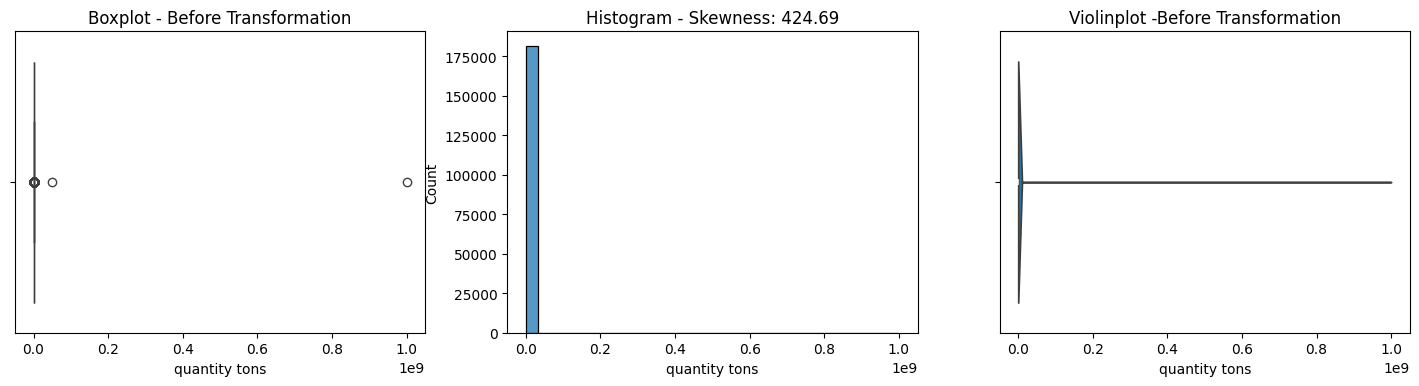

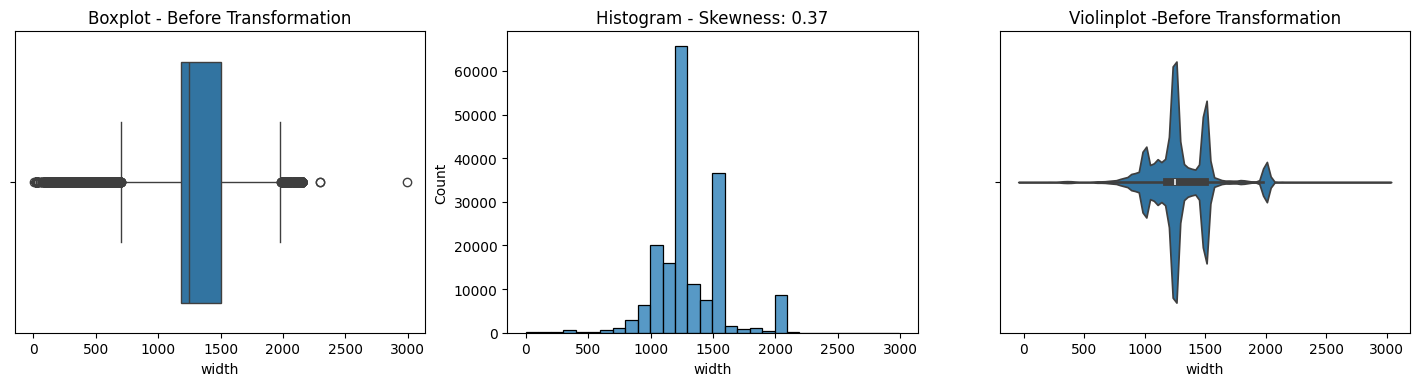

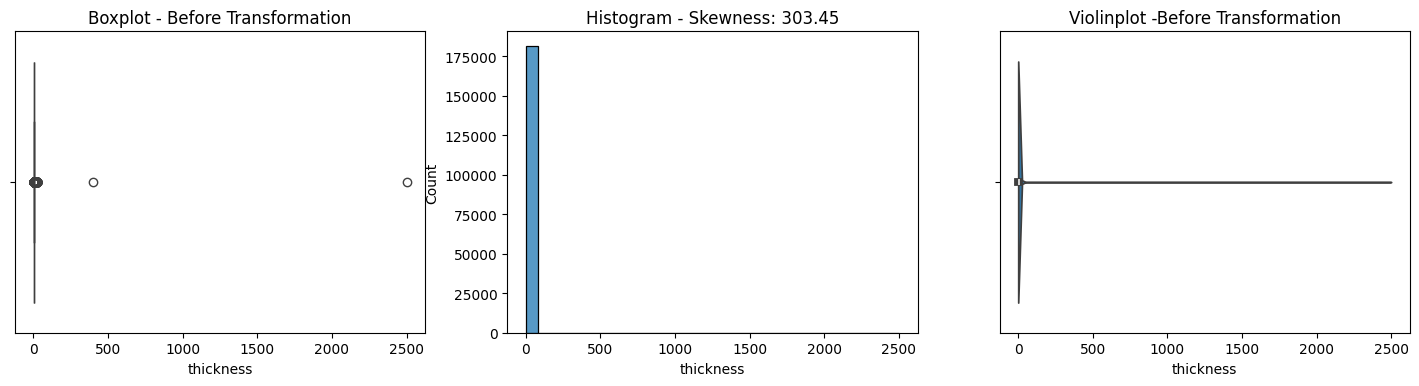

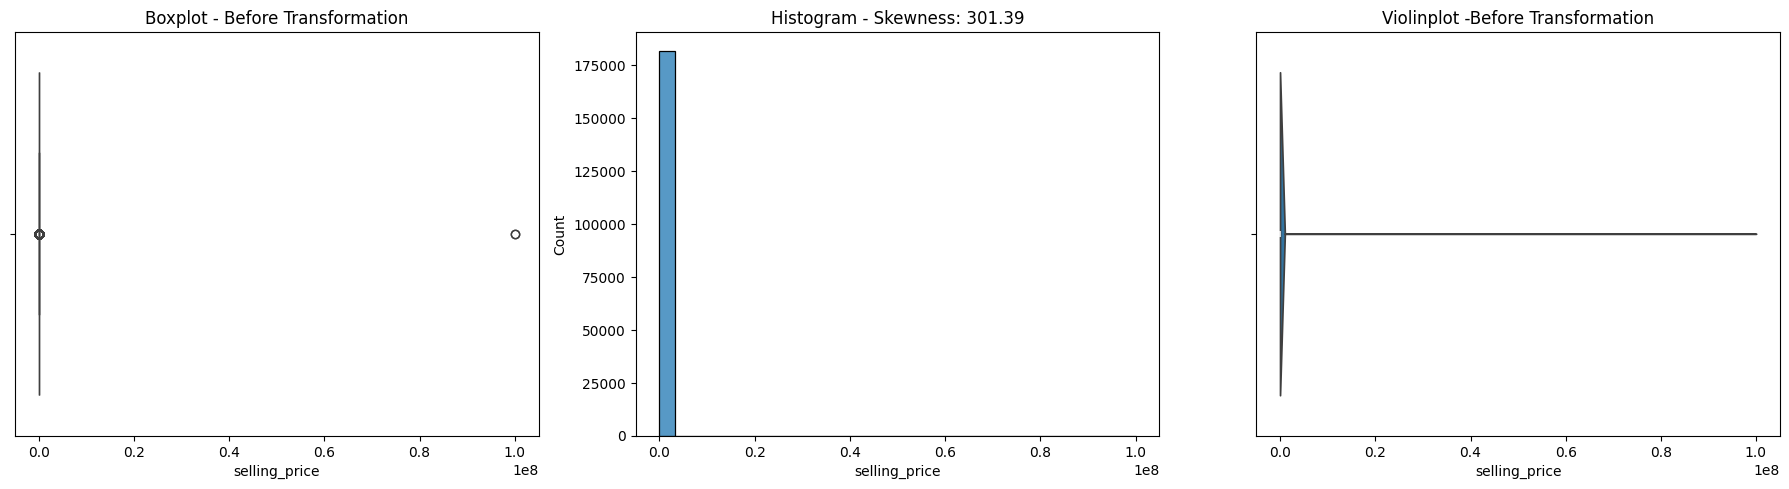

In [30]:
# Specify numerical columns for analysis
numerical_columns = ['quantity tons','width','thickness','selling_price']
# calling the Skewness_plot function
skewness_plot(df, *numerical_columns)


In [29]:
df1 = df.copy()

In [30]:
# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data

def Log_Transformation(df, *column):

    for col_name in column:
        # Log transformation
        df[col_name+'_log'] = np.log1p(df[col_name])

    column = [i for i in df.columns if 'log' in i]

    return skewness_plot(df, * column)

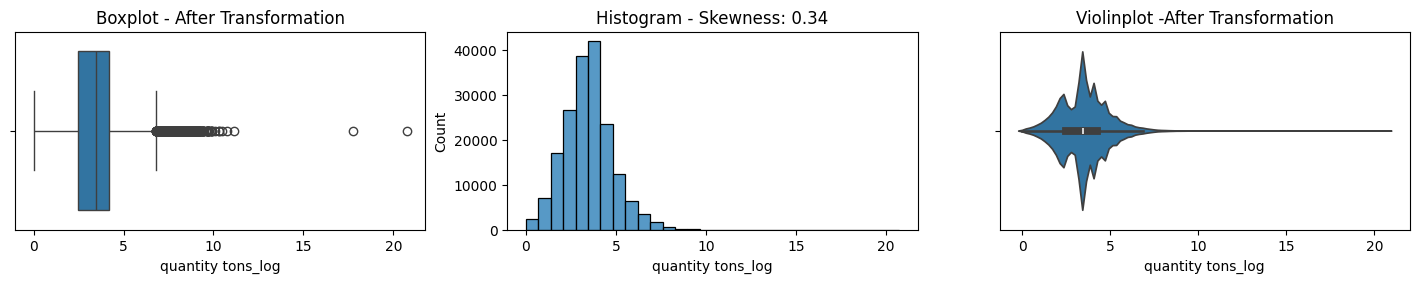

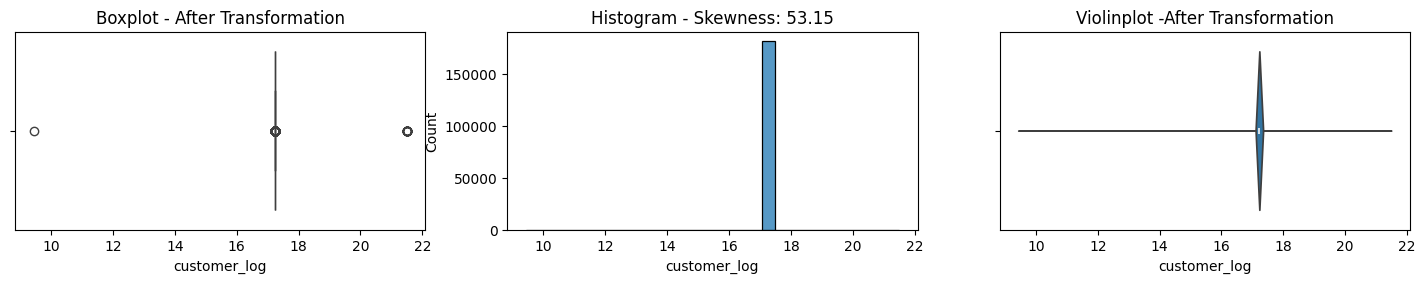

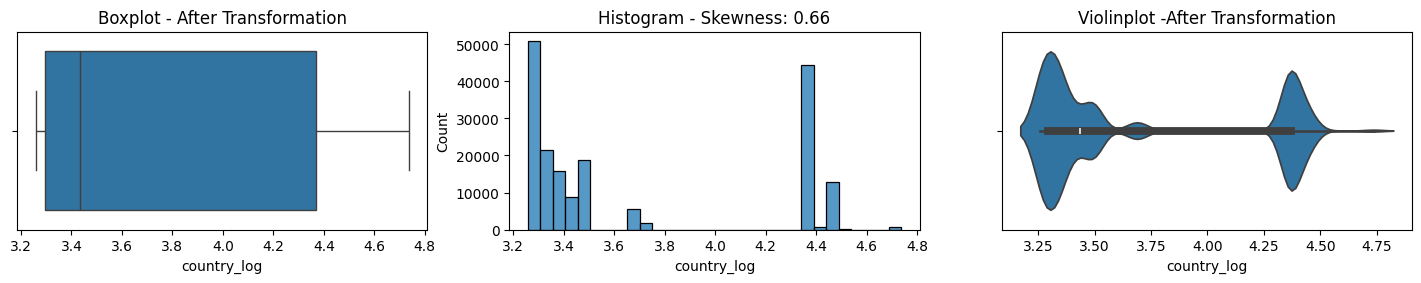

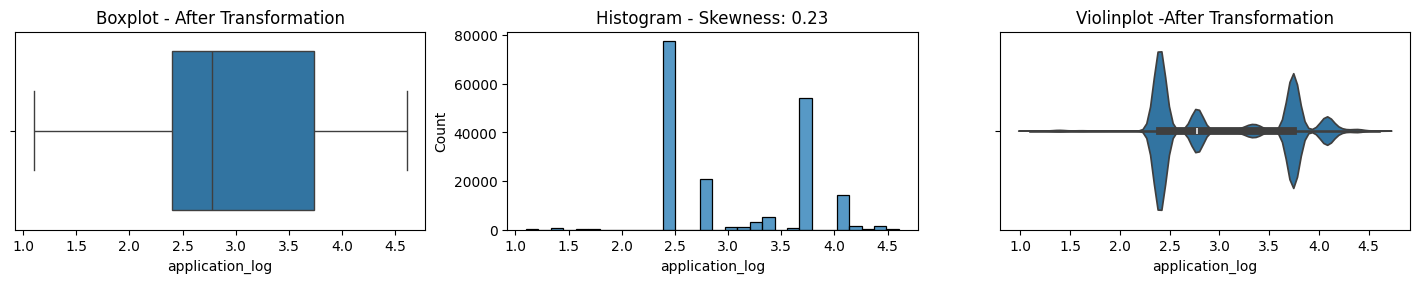

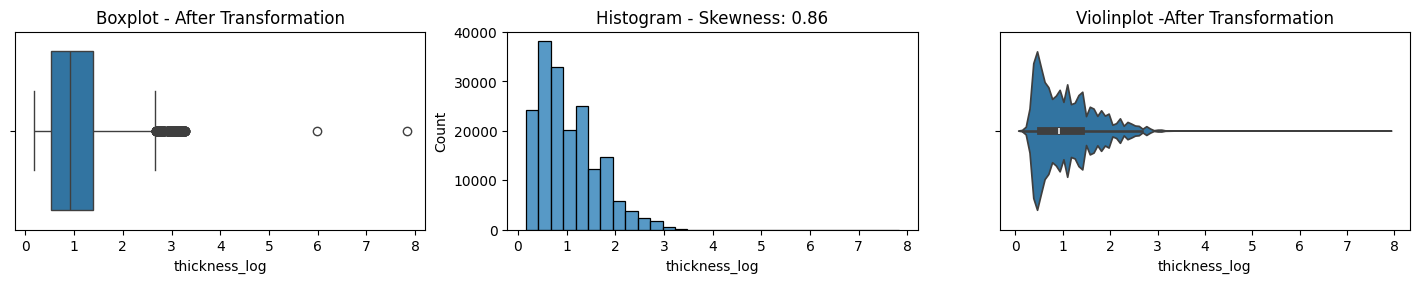

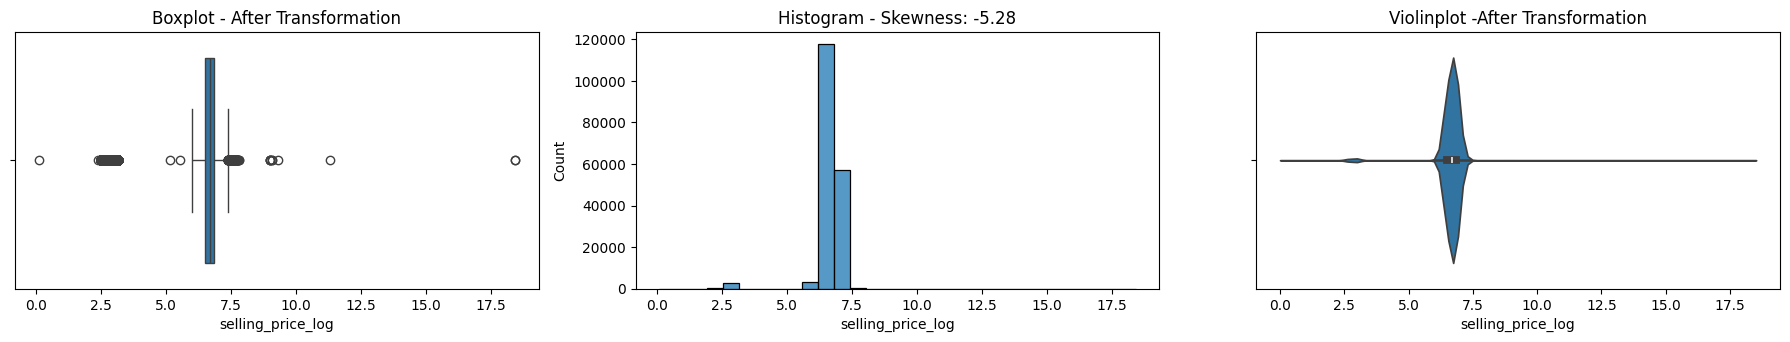

In [31]:
Log_Transformation(df1, *numerical_columns)

<Axes: >

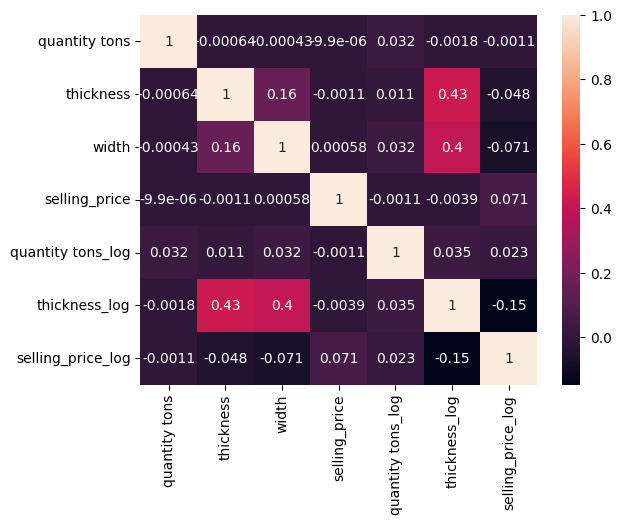

In [34]:
column_name = ['quantity tons','thickness','width','selling_price','quantity tons_log','thickness_log','selling_price_log']
sns.heatmap(df1[column_name].corr(), annot=True)

# Outliers Handling - Inrequartile Range (IQR) method

In [43]:
def outlier_plot(df):

    plt.figure(figsize=(16,10))

    plt.subplot(2, 2, 1)
    sns.boxplot(x='width', data=df)
    plt.title('BoxPlot - width')

    plt.subplot(2, 2, 2)
    sns.boxplot(x='quantity tons_log', data=df)
    plt.title('BoxPlot - quantity tons_log')

    plt.subplot(2, 2, 3)
    sns.boxplot(x='thickness_log', data=df)
    plt.title('BoxPlot - ' + 'thickness_log')

    plt.subplot(2, 2, 4)
    sns.boxplot(x='selling_price_log', data=df)
    plt.title('BoxPlot - ' + 'selling_price_log')
    plt.tight_layout()

    return plt.show()

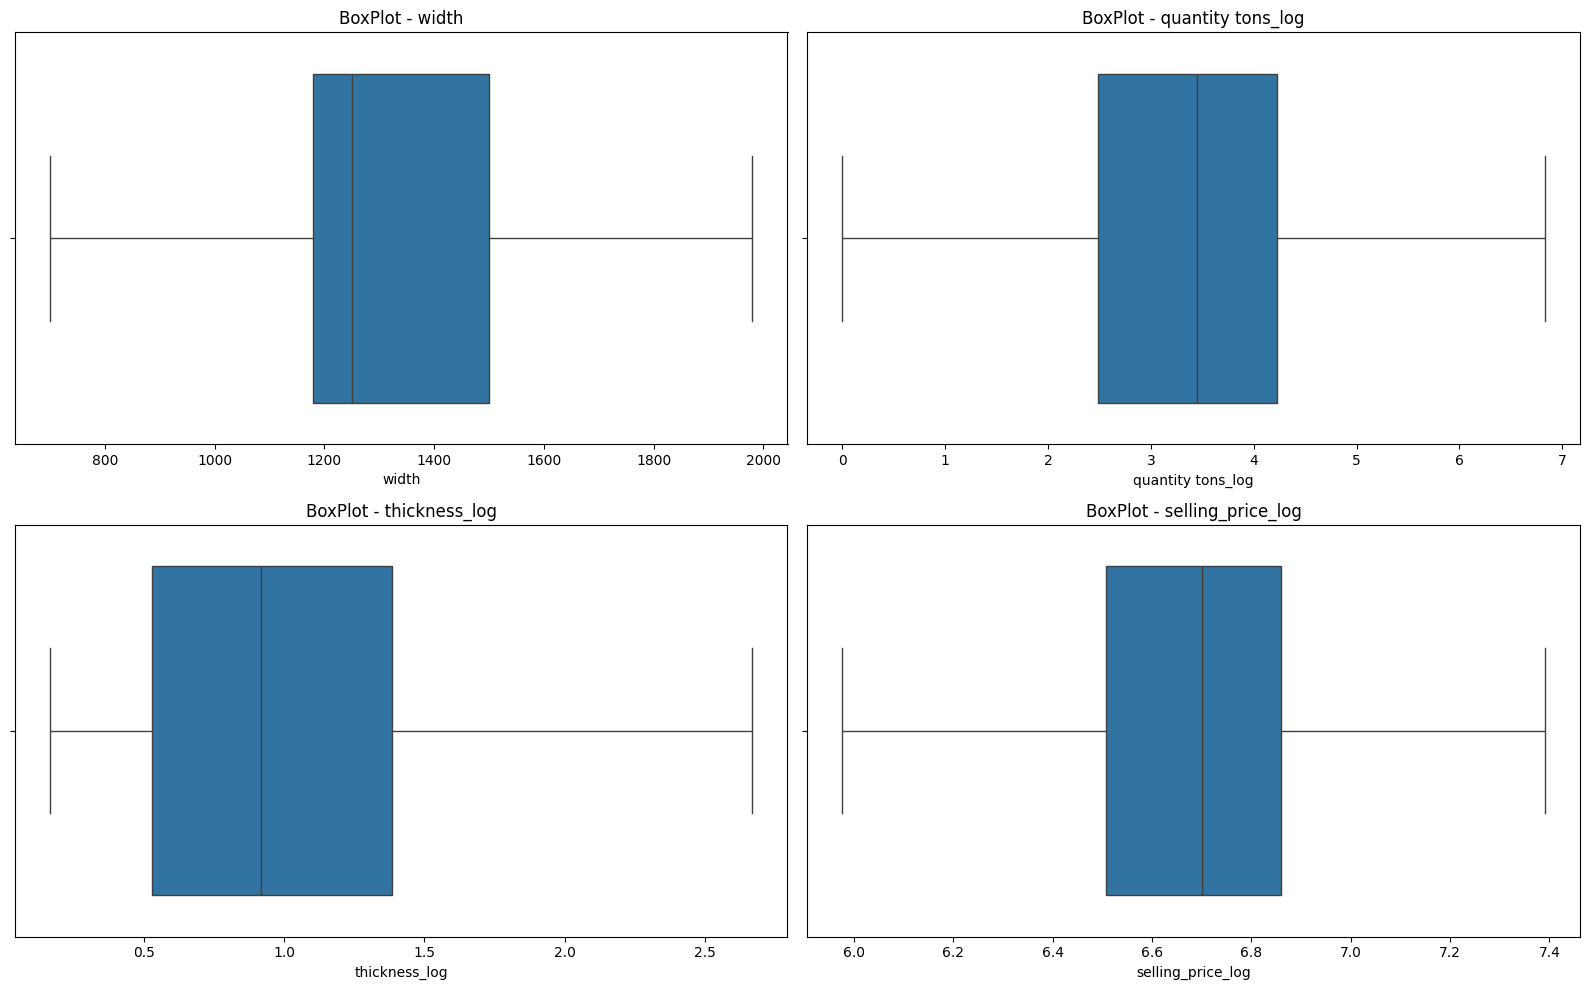

In [49]:
outlier_plot(df1)

In [45]:
df1

item_date  quantity tons    customer  country status item type  \
0      2021-04-01      54.151139  30156308.0     28.0    Won         W   
1      2021-04-01     768.024839  30202938.0     25.0    Won         W   
2      2021-04-01     386.127949  30153963.0     30.0    Won        WI   
3      2021-04-01     202.411065  30349574.0     32.0    Won         S   
4      2021-04-01     785.526262  30211560.0     28.0    Won         W   
...           ...            ...         ...      ...    ...       ...   
181668 2020-07-02     102.482422  30200854.0     25.0    Won         W   
181669 2020-07-02     208.086469  30200854.0     25.0    Won         W   
181670 2020-07-02       4.235594  30200854.0     25.0    Won         W   
181671 2020-07-02      30.365013  30200854.0     25.0    Won         W   
181672 2020-07-02     406.686538  30200854.0     25.0    Won         W   

        application  thickness   width  product_ref delivery date  \
0              10.0       2.00  1500.0   1670798778    2021-07-01   
1              41.0       0.80  1210.0   1668701718    2021-04-01   
2              28.0       0.38   952.0       628377    2021-01-01   
3              59.0       2.30  1317.0   1668701718    2021-01-01   
4              10.0       4.00  2000.0       640665    2021-03-01   
...             ...        ...     ...          ...           ...   
181668         41.0       0.96  1220.0    164141591    2020-07-01   
181669         41.0       0.95  1500.0    164141591    2020-07-01   
181670         41.0       0.71  1250.0    164141591    2020-07-01   
181671         41.0       0.85  1250.0    164141591    2020-07-01   
181672         41.0       0.71  1240.0    164141591    2020-07-01   

        selling_price  quantity tons_log  customer_log  country_log  \
0              854.00           4.010077     17.221905     3.367296   
1             1047.00           6.645123     17.223450     3.258097   
2              644.33           5.958755     17.221827     3.433987   
3              768.00           5.315229     17.228293     3.496508   
4              577.00           6.667626     17.223735     3.367296   
...               ...                ...           ...          ...   
181668         591.00           4.639402     17.223381     3.258097   
181669         589.00           5.342748     17.223381     3.258097   
181670         619.00           1.655480     17.223381     3.258097   
181671         601.00           3.445693     17.223381     3.258097   
181672         607.00           6.010499     17.223381     3.258097   

        application_log  thickness_log  selling_price_log  
0              2.397895       1.098612           6.751101  
1              3.737670       0.587787           6.954639  
2              3.367296       0.322083           6.469762  
3              4.094345       1.193922           6.645091  
4              2.397895       1.609438           6.359574  
...                 ...            ...                ...  
181668         3.737670       0.672944           6.383507  
181669         3.737670       0.667829           6.380123  
181670         3.737670       0.536493           6.429719  
181671         3.737670       0.615186           6.400257  
181672         3.737670       0.536493           6.410175  

[181673 rows x 18 columns]

In [46]:
# Using IQR and clip() methods to handel the outliers and add a new column of DataFrame 

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [47]:
# (Ex: lower threshold = 5 and upeer threshold = 20)
# above upeer threshold values (>20) are converted to upeer threshold value (20) in features
# below lower threshold values (<5) are converted to lower threshold value (5) in features

outlier(df1, 'quantity tons_log')
outlier(df1, 'thickness_log')
outlier(df1, 'selling_price_log')
outlier(df1, 'width')

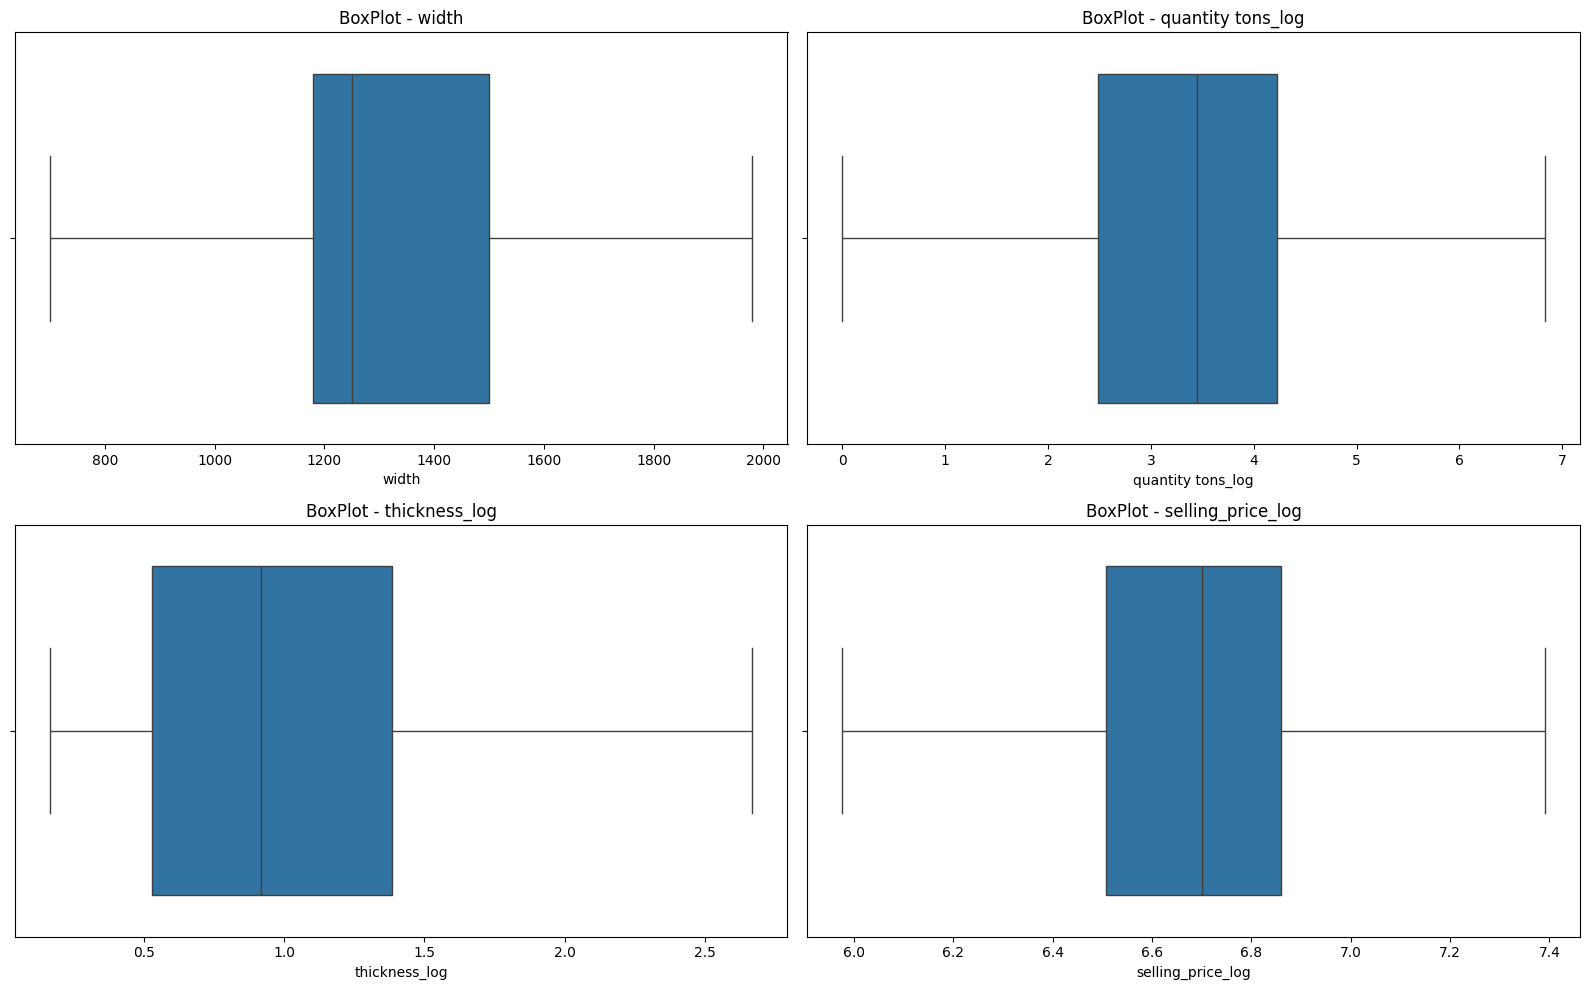

In [48]:
outlier_plot(df1)

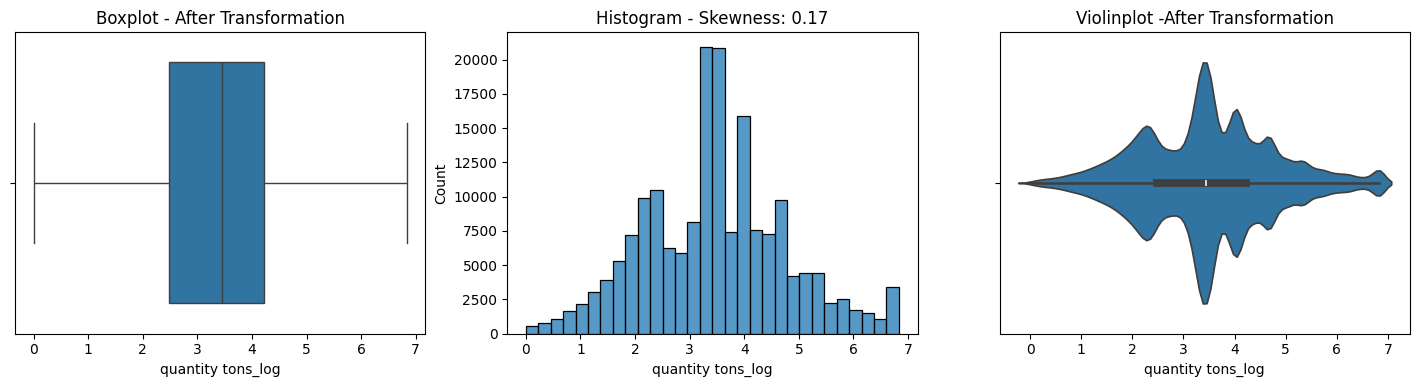

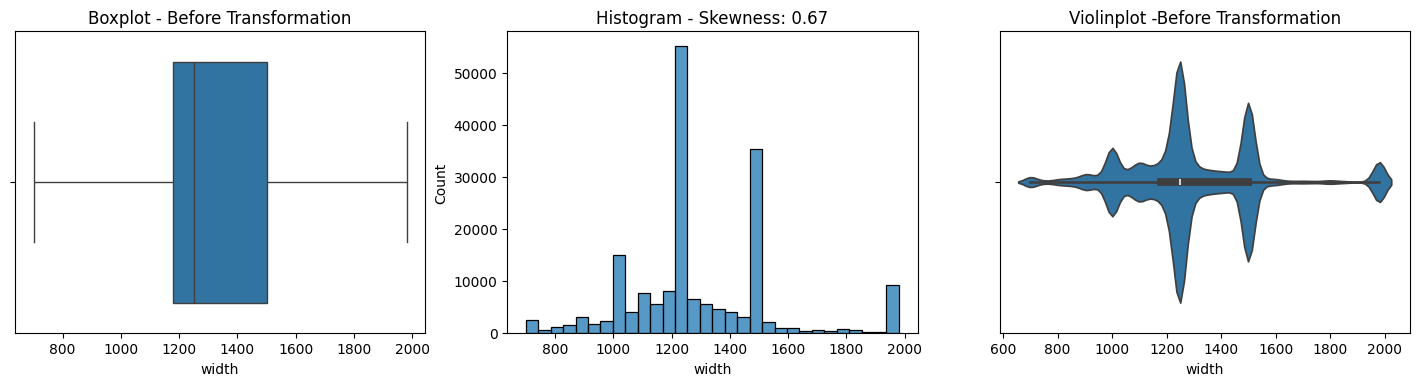

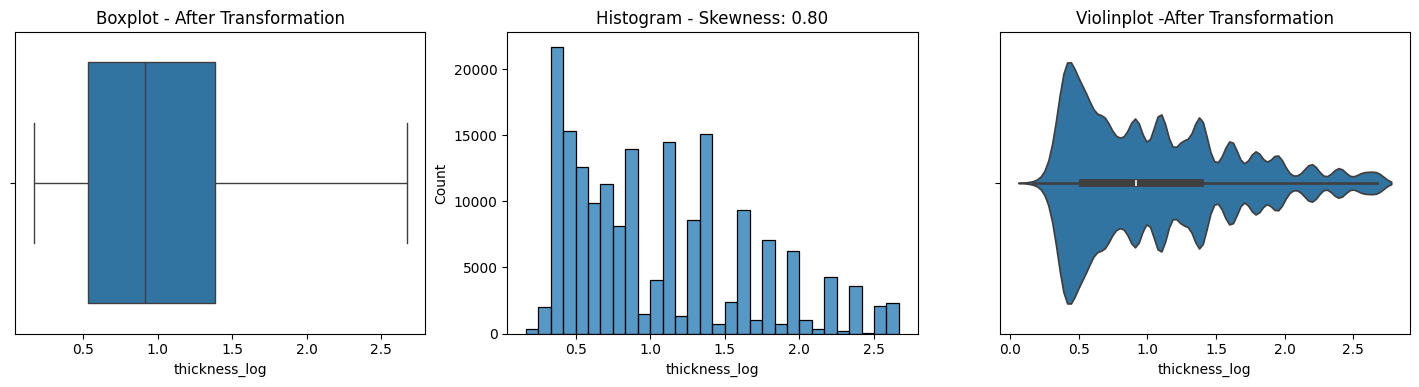

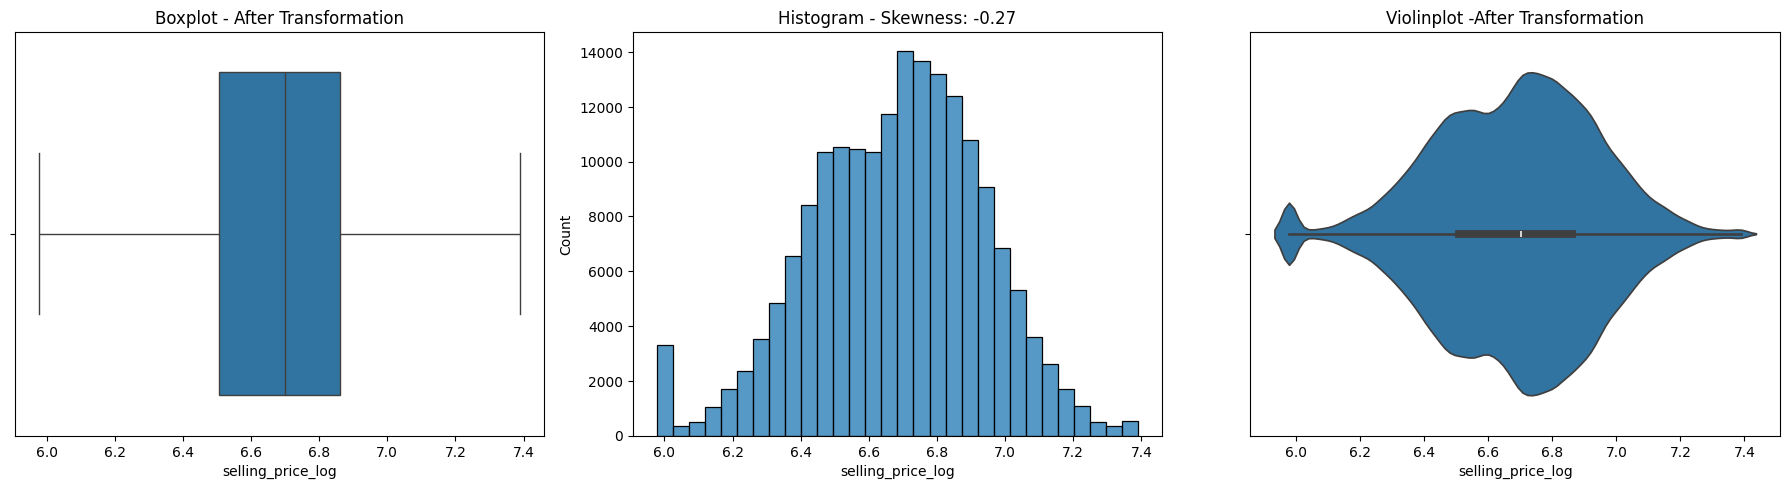

In [50]:
outlier_handle_col = ['quantity tons_log', 'width', 'thickness_log', 'selling_price_log']
skewness_plot(df1, *outlier_handle_col)


In [54]:
df1.head()

item_date  quantity tons    customer  country status item type  \
0 2021-04-01      54.151139  30156308.0     28.0    Won         W   
1 2021-04-01     768.024839  30202938.0     25.0    Won         W   
2 2021-04-01     386.127949  30153963.0     30.0    Won        WI   
3 2021-04-01     202.411065  30349574.0     32.0    Won         S   
4 2021-04-01     785.526262  30211560.0     28.0    Won         W   

   application  thickness   width  product_ref delivery date  selling_price  \
0         10.0       2.00  1500.0   1670798778    2021-07-01         854.00   
1         41.0       0.80  1210.0   1668701718    2021-04-01        1047.00   
2         28.0       0.38   952.0       628377    2021-01-01         644.33   
3         59.0       2.30  1317.0   1668701718    2021-01-01         768.00   
4         10.0       4.00  1980.0       640665    2021-03-01         577.00   

   quantity tons_log  customer_log  country_log  application_log  \
0           4.010077     17.221905     3.367296         2.397895   
1           6.645123     17.223450     3.258097         3.737670   
2           5.958755     17.221827     3.433987         3.367296   
3           5.315229     17.228293     3.496508         4.094345   
4           6.667626     17.223735     3.367296         2.397895   

   thickness_log  selling_price_log  
0       1.098612           6.751101  
1       0.587787           6.954639  
2       0.322083           6.469762  
3       1.193922           6.645091  
4       1.609438           6.359574

<Axes: >

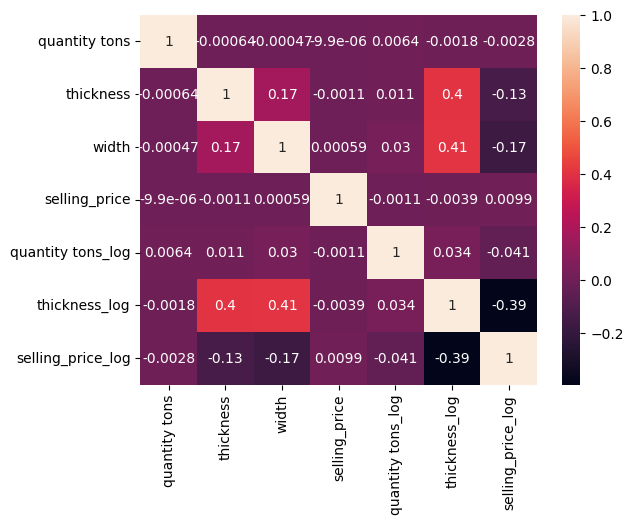

In [56]:
column_name = ['quantity tons','thickness', 'width', 'selling_price', 'quantity tons_log', 'thickness_log', 'selling_price_log']
sns.heatmap(df1[column_name].corr(), annot=True )

In [59]:
df1.drop(columns=['thickness_log'], inplace=True)
df1

item_date  quantity tons    customer  country status item type  \
0      2021-04-01      54.151139  30156308.0     28.0    Won         W   
1      2021-04-01     768.024839  30202938.0     25.0    Won         W   
2      2021-04-01     386.127949  30153963.0     30.0    Won        WI   
3      2021-04-01     202.411065  30349574.0     32.0    Won         S   
4      2021-04-01     785.526262  30211560.0     28.0    Won         W   
...           ...            ...         ...      ...    ...       ...   
181668 2020-07-02     102.482422  30200854.0     25.0    Won         W   
181669 2020-07-02     208.086469  30200854.0     25.0    Won         W   
181670 2020-07-02       4.235594  30200854.0     25.0    Won         W   
181671 2020-07-02      30.365013  30200854.0     25.0    Won         W   
181672 2020-07-02     406.686538  30200854.0     25.0    Won         W   

        application  thickness   width  product_ref delivery date  \
0              10.0       2.00  1500.0   1670798778    2021-07-01   
1              41.0       0.80  1210.0   1668701718    2021-04-01   
2              28.0       0.38   952.0       628377    2021-01-01   
3              59.0       2.30  1317.0   1668701718    2021-01-01   
4              10.0       4.00  1980.0       640665    2021-03-01   
...             ...        ...     ...          ...           ...   
181668         41.0       0.96  1220.0    164141591    2020-07-01   
181669         41.0       0.95  1500.0    164141591    2020-07-01   
181670         41.0       0.71  1250.0    164141591    2020-07-01   
181671         41.0       0.85  1250.0    164141591    2020-07-01   
181672         41.0       0.71  1240.0    164141591    2020-07-01   

        selling_price  quantity tons_log  customer_log  country_log  \
0              854.00           4.010077     17.221905     3.367296   
1             1047.00           6.645123     17.223450     3.258097   
2              644.33           5.958755     17.221827     3.433987   
3              768.00           5.315229     17.228293     3.496508   
4              577.00           6.667626     17.223735     3.367296   
...               ...                ...           ...          ...   
181668         591.00           4.639402     17.223381     3.258097   
181669         589.00           5.342748     17.223381     3.258097   
181670         619.00           1.655480     17.223381     3.258097   
181671         601.00           3.445693     17.223381     3.258097   
181672         607.00           6.010499     17.223381     3.258097   

        application_log  selling_price_log  
0              2.397895           6.751101  
1              3.737670           6.954639  
2              3.367296           6.469762  
3              4.094345           6.645091  
4              2.397895           6.359574  
...                 ...                ...  
181668         3.737670           6.383507  
181669         3.737670           6.380123  
181670         3.737670           6.429719  
181671         3.737670           6.400257  
181672         3.737670           6.410175  

[181673 rows x 17 columns]

In [60]:
df1.dtypes

item_date            datetime64[ns]
quantity tons               float64
customer                    float64
country                     float64
status                       object
item type                    object
application                 float64
thickness                   float64
width                       float64
product_ref                   int64
delivery date        datetime64[ns]
selling_price               float64
quantity tons_log           float64
customer_log                float64
country_log                 float64
application_log             float64
selling_price_log           float64
dtype: object

In [61]:
df2 = df1.copy()

# Find the difference between item and delivery date and add the new column in dataframe
df2['day_difference'] = (pd.to_datetime(df2['item_date']) - pd.to_datetime(df2['delivery date'])).dt.days.abs()

In [63]:
df2['item_date'] = pd.to_datetime(df2['item_date'], format='%y%m%d')
df2['delivery date'] = pd.to_datetime(df2['delivery date'], format='%y%m%d')

df2['item_date_day'] = df2['item_date'].dt.day
df2['item_date_month'] = df2['item_date'].dt.month
df2['item_date_year'] = df2['item_date'].dt.year
df2

item_date  quantity tons    customer  country status item type  \
0      2021-04-01      54.151139  30156308.0     28.0    Won         W   
1      2021-04-01     768.024839  30202938.0     25.0    Won         W   
2      2021-04-01     386.127949  30153963.0     30.0    Won        WI   
3      2021-04-01     202.411065  30349574.0     32.0    Won         S   
4      2021-04-01     785.526262  30211560.0     28.0    Won         W   
...           ...            ...         ...      ...    ...       ...   
181668 2020-07-02     102.482422  30200854.0     25.0    Won         W   
181669 2020-07-02     208.086469  30200854.0     25.0    Won         W   
181670 2020-07-02       4.235594  30200854.0     25.0    Won         W   
181671 2020-07-02      30.365013  30200854.0     25.0    Won         W   
181672 2020-07-02     406.686538  30200854.0     25.0    Won         W   

        application  thickness   width  product_ref  ... selling_price  \
0              10.0       2.00  1500.0   1670798778  ...        854.00   
1              41.0       0.80  1210.0   1668701718  ...       1047.00   
2              28.0       0.38   952.0       628377  ...        644.33   
3              59.0       2.30  1317.0   1668701718  ...        768.00   
4              10.0       4.00  1980.0       640665  ...        577.00   
...             ...        ...     ...          ...  ...           ...   
181668         41.0       0.96  1220.0    164141591  ...        591.00   
181669         41.0       0.95  1500.0    164141591  ...        589.00   
181670         41.0       0.71  1250.0    164141591  ...        619.00   
181671         41.0       0.85  1250.0    164141591  ...        601.00   
181672         41.0       0.71  1240.0    164141591  ...        607.00   

        quantity tons_log  customer_log  country_log  application_log  \
0                4.010077     17.221905     3.367296         2.397895   
1                6.645123     17.223450     3.258097         3.737670   
2                5.958755     17.221827     3.433987         3.367296   
3                5.315229     17.228293     3.496508         4.094345   
4                6.667626     17.223735     3.367296         2.397895   
...                   ...           ...          ...              ...   
181668           4.639402     17.223381     3.258097         3.737670   
181669           5.342748     17.223381     3.258097         3.737670   
181670           1.655480     17.223381     3.258097         3.737670   
181671           3.445693     17.223381     3.258097         3.737670   
181672           6.010499     17.223381     3.258097         3.737670   

        selling_price_log  day_difference  item_date_day  item_date_month  \
0                6.751101              91              1                4   
1                6.954639               0              1                4   
2                6.469762              90              1                4   
3                6.645091              90              1                4   
4                6.359574              31              1                4   
...                   ...             ...            ...              ...   
181668           6.383507               1              2                7   
181669           6.380123               1              2                7   
181670           6.429719               1              2                7   
181671           6.400257               1              2                7   
181672           6.410175               1              2                7   

        item_date_year  
0                 2021  
1                 2021  
2                 2021  
3                 2021  
4                 2021  
...                ...  
181668            2020  
181669            2020  
181670            2020  
181671            2020  
181672            2020  

[181673 rows x 21 columns]

In [39]:
# split the non-negative value of 'Date_difference' column in separate dataFrame

non_negative_date_df = df2[df2['day_difference'] > 0]

# split negative value od 'Date_difference' column in another dataframe

negative_delivery_date_df = df2[df2['day_difference'] <= 0]

non_negative_date_df.shape, negative_delivery_date_df.shape

((181213, 19), (460, 19))

In [40]:
# make a copy of that

correct_delivery_date = non_negative_date_df.copy()
inconsistance_delivery_date = negative_delivery_date_df.copy()

In [41]:
from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              ExtraTreesRegressor,
                              GradientBoostingRegressor,
                              HistGradientBoostingRegressor
                              )
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
class Regression:

    def __init__(self, x, y):
        self.models = {
            'AdaboostRegressor': AdaBoostRegressor(),
            'RandomForestRegressor': RandomForestRegressor(),
            'ExtraTreesRegressor': ExtraTreesRegressor(),
            'GradientBoostingRegressor': GradientBoostingRegressor(),
            'HistGradientBoostingRegressor': HistGradientBoostingRegressor(),
            'DecisionTreeRegressor' : DecisionTreeRegressor(),
            'XGBRegressor': XGBRegressor()
        }
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    def evaluate_model(self, model_name, model):
        y_train_pred = model.fit(self.x_train, self.y_train).predict(self.x_train)
        y_test_pred = model.predict(self.x_test)

        result = {
            'Model_Name': model_name,
            'Train_Mean_Square_Error': f'{mean_squared_error(self.y_train, y_train_pred): .4e}',
            'Test_Mean_Square_Error': f'{mean_squared_error(self.y_test, y_test_pred): .4e}',
            'Train_Mean_Absolute_Error': round(mean_absolute_error(self.y_train, y_train_pred), 4),
            'Test_Mean_Absolute_Error': round(mean_absolute_error(self.y_test, y_test_pred), 4),
            'Train_R2_Score': f'{r2_score(self.y_train, y_train_pred): .4e}',
            'Test_R2_Score': round(r2_score(self.y_test, y_test_pred), 4),
        }

        return result

    def all_models(self):
        # Train and evalute each model
        results = [self.evaluate_model(model_name, model) for model_name, model in self.models.items()]

        self.model_score_df = pd.DataFrame(results)

        return self.model_score_df


In [43]:
# categorical to numerical conversion

enc = OrdinalEncoder()
for col in ['delivery date','item_date', 'status','item type']:
    correct_delivery_date[col] = enc.fit_transform(correct_delivery_date[[col]])
    inconsistance_delivery_date[col] = enc.fit_transform(inconsistance_delivery_date[[col]])

In [44]:
# split to asign the independend and depentend features in correct_delivery_date

y = correct_delivery_date['day_difference']
x = correct_delivery_date.drop(['day_difference','item_date', 'delivery date'], axis= 1)

In [45]:
# Train models using the 'regression_method

models = Regression(x, y)
results_df = models.all_models()
results_df


Model_Name Train_Mean_Square_Error  \
0              AdaboostRegressor              1.8698e+03   
1          RandomForestRegressor              1.6941e+01   
2            ExtraTreesRegressor              0.0000e+00   
3      GradientBoostingRegressor              7.6230e+02   
4  HistGradientBoostingRegressor              4.8190e+02   
5          DecisionTreeRegressor              0.0000e+00   
6                   XGBRegressor              2.8596e+02   

  Test_Mean_Square_Error  Train_Mean_Absolute_Error  Test_Mean_Absolute_Error  \
0             1.8762e+03                    36.7800                   36.7159   
1             1.2019e+02                     1.5162                    4.0657   
2             9.0149e+01                     0.0000                    3.1684   
3             7.6528e+02                    21.2611                   21.2696   
4             5.0041e+02                    15.9518                   16.1128   
5             2.1733e+02                     0.0000                    3.6562   
6             3.2487e+02                    11.4636                   12.0324   

  Train_R2_Score  Test_R2_Score  
0    -1.1643e-01        -0.1316  
1     9.8988e-01         0.9275  
2     1.0000e+00         0.9456  
3     5.4483e-01         0.5384  
4     7.1226e-01         0.6982  
5     1.0000e+00         0.8689  
6     8.2925e-01         0.8041

In [46]:
def train_and_evalute(x, y, inconsistent_data):
    # Split the original dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Train a RandomForestRegressor
    model = RandomForestRegressor(random_state=42)
    model.fit(x_train, y_train)

    # predictions on training and testing sets
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate mean Square errors
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Train_Mean_Square_Error:{round(mse_train, 4)}')
    print(f'Test_Mean_Square_Error: {round(mse_test, 4)}')

    # Extract features for inconsistent delivery date data
    y_new = inconsistent_data['day_difference']
    x_new = inconsistent_data.drop(['day_difference','item_date', 'delivery date'],axis = 1)

    # Predict day_difference for inconsistent delivery dates
    day_pred = model.predict(x_new)

    return day_pred


In [47]:
day_pred =train_and_evalute(x, y, inconsistance_delivery_date)

Train_Mean_Square_Error:17.1093
Test_Mean_Square_Error: 118.0727


In [48]:
# Update 'day_difference' in the original Dataframe

negative_delivery_date_df['day_difference'] = day_pred

In [49]:
# df["item_date_1"] = pd.to_datetime(df["item_date"].astype(str).str.split('.').str[0],format='%y%m%d',errors='coerce')
# df["delivery_date_1"] = pd.to_datetime(df["delivery date"].astype(str).str.split('.').str[0],format='%y%m%d',errors='coerce')
# df["quantity tons"] = pd.to_numeric(df["quantity tons"],errors='coerce')

In [50]:
# df["item_date_1"] = pd.to_datetime(df["item_date"], unit="s", errors="coerce")
# df["delivery date_1"] = pd.to_datetime(df["delivery date"], unit="s", errors="coerce")
# df["quantity tons"] = pd.to_numeric(df["delivery date"], errors="coerce")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181673 non-null  datetime64[ns]
 1   quantity tons  181673 non-null  float64       
 2   customer       181673 non-null  float64       
 3   country        181673 non-null  float64       
 4   status         181673 non-null  object        
 5   item type      181673 non-null  object        
 6   application    181673 non-null  float64       
 7   thickness      181673 non-null  float64       
 8   width          181673 non-null  float64       
 9   product_ref    181673 non-null  int64         
 10  delivery date  181673 non-null  datetime64[ns]
 11  selling_price  181673 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(2)
memory usage: 16.6+ MB


In [52]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [53]:
# removing the "00000" datas from "material_ref" column

df["material_ref"] = df["material_ref"].apply(lambda x: np.nan if str(x).startswith("00000") else x)

KeyError: 'material_ref'

In [ ]:
df.isnull().sum()


id                      2
item_date               1
quantity tons           1
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
material_ref       100645
product_ref             0
delivery date           1
selling_price           1
item_date_1        181673
delivery_date_1    181673
dtype: int64

In [ ]:
# "material_ref" have a maximum number of null values ,so we need to drop that column
# id is a unique value so we also drop that column

df.drop(columns=["id","material_ref"],inplace=True)

In [ ]:
df.isnull().sum()


item_date               1
quantity tons           1
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
product_ref             0
delivery date           1
selling_price           1
item_date_1        181673
delivery_date_1    181673
dtype: int64

In [ ]:
df.describe().T

count              mean         min         25%  \
item_date        181672.0   20204588.226947  19950000.0  20200929.0   
quantity tons    181672.0       5874.925754     -2000.0   10.970298   
customer         181672.0   30512209.027968     12458.0  30196884.0   
country          181645.0         44.893022        25.0        26.0   
application      181649.0         25.615809         2.0        10.0   
thickness        181672.0          2.564827        0.18         0.7   
width            181673.0       1295.286724         1.0      1180.0   
product_ref      181673.0  473967910.724318    611728.0    611993.0   
delivery date    181672.0   20207381.557934  20190401.0  20201101.0   
selling_price    181672.0       1918.035505     -1160.0       669.0   
item_date_1             0               NaT         NaT         NaT   
delivery_date_1         0               NaT         NaT         NaT   

                        50%           75%           max               std  
item_date        20201130.0    20210203.0    20210401.0       4551.119094  
quantity tons     30.364635     67.160612  1000000000.0    2349081.241674  
customer         30205242.0    30280416.0  2147483647.0   24333815.584025  
country                30.0          78.0         113.0         24.404214  
application            15.0          41.0          99.0         17.754175  
thickness               1.5           3.0        2500.0          6.572321  
width                1250.0        1500.0        2990.0        261.631754  
product_ref        640665.0  1332077137.0  1722207579.0  717510064.710402  
delivery date    20210101.0    20210401.0    30310101.0      24110.589486  
selling_price         812.0         953.0   100001015.0     331795.642555  
item_date_1             NaT           NaT           NaT               NaN  
delivery_date_1         NaT           NaT           NaT               NaN

In [ ]:
print(df[['item_date_1', 'delivery_date_1']].head())
print(df[['item_date_1', 'delivery_date_1']].isna().sum())

  item_date_1 delivery_date_1
0         NaT             NaT
1         NaT             NaT
2         NaT             NaT
3         NaT             NaT
4         NaT             NaT
item_date_1        181673
delivery_date_1    181673
dtype: int64


In [ ]:
# converting selling_price values into null values

df["selling_price"] = df["selling_price"].apply(lambda x: np.nan if x <= 0 else x)

In [ ]:
df.nunique()

item_date             252
quantity tons      181672
customer             1169
country                17
status                  9
item type               7
application            30
thickness             594
width                1386
product_ref            33
delivery date          28
selling_price        9789
item_date_1             0
delivery_date_1         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_date        181672 non-null  float64       
 1   quantity tons    181672 non-null  float64       
 2   customer         181672 non-null  float64       
 3   country          181645 non-null  float64       
 4   status           181671 non-null  object        
 5   item type        181673 non-null  object        
 6   application      181649 non-null  float64       
 7   thickness        181672 non-null  float64       
 8   width            181673 non-null  float64       
 9   product_ref      181673 non-null  int64         
 10  delivery date    181672 non-null  float64       
 11  selling_price    181665 non-null  float64       
 12  item_date_1      0 non-null       datetime64[ns]
 13  delivery_date_1  0 non-null       datetime64[ns]
dtypes: datetime64[ns](2)

In [ ]:
df.isnull().sum()

item_date               1
quantity tons           1
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
product_ref             0
delivery date           1
selling_price           8
item_date_1        181673
delivery_date_1    181673
dtype: int64

# Hanlding the null values using mean(), median() and mode()

In [ ]:
# object columns and mode method
df["item_date_1"].fillna(df["item_date_1"].mode().iloc[0],inplace=True)
df["delivery date_1"].fillna(df["delivery date_1"].mode().iloc[0],inplace=True)
df["status"].fillna(df["status"].mode().iloc[0],inplace=True)
df["item_date"].fillna(df["item_date_1"].mode().iloc[0],inplace=True)
df["delivery date"].fillna(df["delivery date"].mode().iloc[0],inplace=True)

IndexError: single positional indexer is out-of-bounds

In [ ]:
df.isnull().sum()

item_date           0
quantity tons       1
customer            1
country            28
status              0
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       0
selling_price       8
item_date_1         0
delivery date_1     0
dtype: int64

In [ ]:
# numerical columns and median()
df["quantity tons"].fillna(df["quantity tons"].median(),inplace=True)
df["customer"].fillna(df["customer"].median(),inplace=True)
df["country"].fillna(df["country"].median(),inplace=True)
df["application"].fillna(df["application"].median(),inplace=True)
df["thickness"].fillna(df["thickness"].median(),inplace=True)
df["selling_price"].fillna(df["selling_price"].median(),inplace=True)

In [ ]:
df.isnull().sum()


item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64

# Encoding categorical columns


In [ ]:
df.head()

item_date  quantity tons    customer  country status item type  \
0  20210401.0     20210701.0  30156308.0     28.0    Won         W   
1  20210401.0     20210401.0  30202938.0     25.0    Won         W   
2  20210401.0     20210101.0  30153963.0     30.0    Won        WI   
3  20210401.0     20210101.0  30349574.0     32.0    Won         S   
4  20210401.0     20210301.0  30211560.0     28.0    Won         W   

   application  thickness   width  product_ref  delivery date  selling_price  \
0         10.0       2.00  1500.0   1670798778     20210701.0         854.00   
1         41.0       0.80  1210.0   1668701718     20210401.0        1047.00   
2         28.0       0.38   952.0       628377     20210101.0         644.33   
3         59.0       2.30  1317.0   1668701718     20210101.0         768.00   
4         10.0       4.00  2000.0       640665     20210301.0         577.00   

          item_date_1     delivery date_1  
0 1970-08-22 22:00:01 1970-08-22 22:05:01  
1 1970-08-22 22:00:01 1970-08-22 22:00:01  
2 1970-08-22 22:00:01 1970-08-22 21:55:01  
3 1970-08-22 22:00:01 1970-08-22 21:55:01  
4 1970-08-22 22:00:01 1970-08-22 21:58:21

In [ ]:
df["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [ ]:
states = {'Won':1,
          'Draft':2,
          'To be approved':3,
          'Lost':0,
          'Not lost for AM':4,
          'Wonderful':5,
          'Revised':6,
          'Offered':7,
          'Offerable':8}

df["status"] = df["status"].map(states)


In [ ]:
df["status"].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8], dtype=int64)

In [ ]:
df["item type"].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [ ]:
item_t = {'W':0,
          'WI':1,
          'S':2,
          'Others':3,
          'PL':4,
          'IPL':5,
          'SLAWR':6}

df["item type"] = df["item type"].map(item_t)

In [ ]:
df["item type"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [ ]:
df.describe().T

count                           mean                  min  \
quantity tons    181673.0                20207381.572903           20190401.0   
customer         181673.0                  30512207.3383              12458.0   
country          181673.0                      44.890727                 25.0   
status           181673.0                       1.316684                  0.0   
item type        181673.0                       0.900558                  0.0   
application      181673.0                      25.614406                  2.0   
thickness        181673.0                       2.564822                 0.18   
width            181673.0                    1295.286724                  1.0   
product_ref      181673.0               473967910.724318             611728.0   
delivery date    181673.0                20207381.572903           20190401.0   
selling_price    181673.0                    1918.075544                  0.1   
item_date_1        181673  1970-08-22 20:23:08.208308332  1970-08-19 21:40:00   
delivery date_1    181673  1970-08-22 21:09:41.572902960  1970-08-22 16:26:41   

                                 25%                  50%  \
quantity tons             20201101.0           20210101.0   
customer                  30196884.0           30205242.0   
country                         26.0                 30.0   
status                           1.0                  1.0   
item type                        0.0                  0.0   
application                     10.0                 15.0   
thickness                        0.7                  1.5   
width                         1180.0               1250.0   
product_ref                 611993.0             640665.0   
delivery date             20201101.0           20210101.0   
selling_price                  669.0                812.0   
item_date_1      1970-08-22 19:22:09  1970-08-22 19:25:30   
delivery date_1  1970-08-22 19:25:01  1970-08-22 21:55:01   

                                 75%                  max               std  
quantity tons             20210401.0           30310101.0      24110.523972  
customer                  30280416.0         2147483647.0   24333748.622752  
country                         78.0                113.0         24.403034  
status                           1.0                  8.0           1.33031  
item type                        2.0                  6.0          1.117545  
application                     41.0                 99.0         17.753421  
thickness                        3.0               2500.0          6.572303  
width                         1500.0               2990.0        261.631754  
product_ref             1332077137.0         1722207579.0  717510064.710402  
delivery date             20210401.0           30310101.0      24110.523972  
selling_price                  953.0          100001015.0     331794.729145  
item_date_1      1970-08-22 21:56:43  1970-08-22 22:00:01               NaN  
delivery date_1  1970-08-22 22:00:01  1970-12-17 19:28:21               NaN

In [ ]:
df["item_date_1"].isnull().sum()

0

In [ ]:
df["delivery date_1"].std()

Timedelta('0 days 01:13:36.505157232')

In [ ]:
print(df['item_date_1'].dtype)
print(df['delivery date_1'].dtype)

datetime64[ns]
datetime64[ns]


In [ ]:
print(df['item_date_1'].nunique())
print(df['delivery date_1'].nunique())

252
28
